# Load 20 Newsgroups Dataset
This cell fetches the training and test subsets of the 20 Newsgroups dataset for text classification.

In [149]:
from sklearn.datasets import fetch_20newsgroups

# Fetch training and test datasets
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')


# Create or Load Preprocessor
The preprocessor transforms raw text into TF-IDF features and applies PCA for dimensionality reduction.
You can either create a new preprocessor or load an existing one.

In [150]:
from text_helper import Preprocessor

# Uncomment to create a new preprocessor (optional)
# preprocessor = Preprocessor(newsgroups_train.data, force_create=True, n_components_pca=500)

Start creating preprocessor. It would be saved to models\Preprocessor_pretrained.pkl

Start creating TfIdf tokenizer.

TfIdf tokenizer saved to models\TfIdf_pretrained.pkl
Start creating pca transformer with 500 components.

PCA transformer saved to models\pca_transformer.pkl


In [151]:
from text_helper import load_preprocessor

# Load the pretrained preprocessor
preprocessor = load_preprocessor()

# Assert preprocessor is loaded
assert preprocessor is not None, "Failed to load preprocessor"

# Preprocess Data
Transform the training and test data using the preprocessor.

In [152]:
# Preprocess training and test data
x_train = preprocessor.preprocess(newsgroups_train.data)
x_test = preprocessor.preprocess(newsgroups_test.data)

# Train Linear Model
Train a Linear NN model on the preprocessed data.

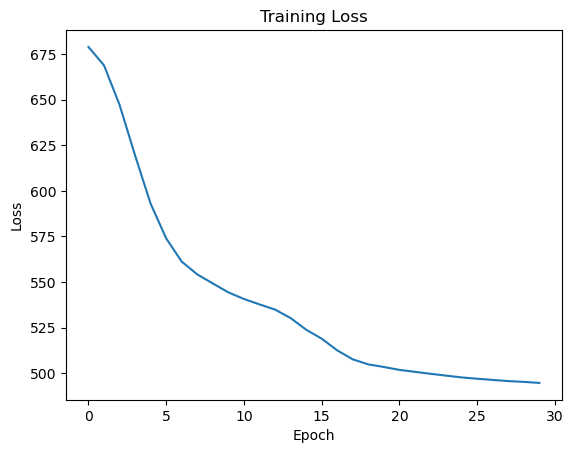

Training Epochs: 100%|██████████| 30/30 [00:20<00:00,  1.47it/s]

Test accuracy score: 72.68%

Train and saving done



In [157]:
from dl_functions import train

# Train CNN model with 10 epochs
model = train(x_train, x_test, newsgroups_train.target, newsgroups_test.target, model_type="Linear", epoch=30)

# Train CNN Model
Train a convolutional neural network (CNN) model on the preprocessed data.

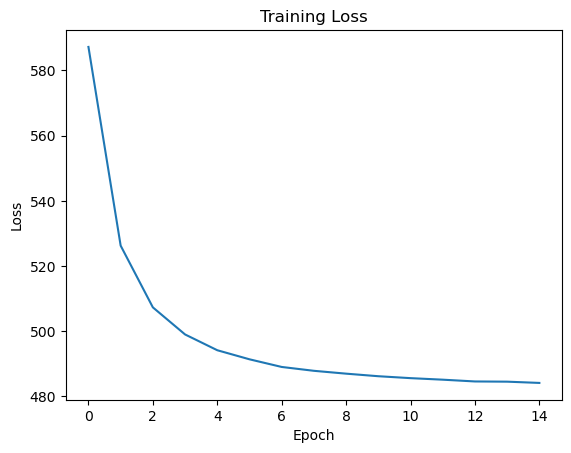

Training Epochs: 100%|██████████| 15/15 [00:21<00:00,  1.45s/it]

Test accuracy score: 73.62%

Train and saving done



In [158]:
from dl_functions import train

# Train CNN model with 10 epochs
model = train(x_train, x_test, newsgroups_train.target, newsgroups_test.target, model_type="CNN", epoch=15)

# Train Logistic Regression Model
Train a logistic regression model on the preprocessed data.

In [154]:
from dl_functions import train

# Train logistic regression model
model = train(x_train, x_test, newsgroups_train.target, newsgroups_test.target, model_type="LogReg")

Test accuracy score: 75.42%

Train and saving done



# Predict on a Single Sample
Use the trained model to predict the category of a test sample.

In [160]:
from dl_functions import predict

# Preprocess a single test sample and predict its category
sample = preprocessor.preprocess(newsgroups_test.data[0])
prediction = predict(sample, model_type="Linear")

print(f"Predicted class: {prediction}")

Predicted class: [4]


# Run Flask Server
Start the Flask server to handle PDF uploads and predict their categories.

In [161]:
!python server.py

^C
